In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.tree import export_graphviz
import graphviz

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [5]:
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.951049


In [6]:
# Visualization 
export_graphviz(tree, out_file="mytree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
    graphviz.Source(dot_graph)

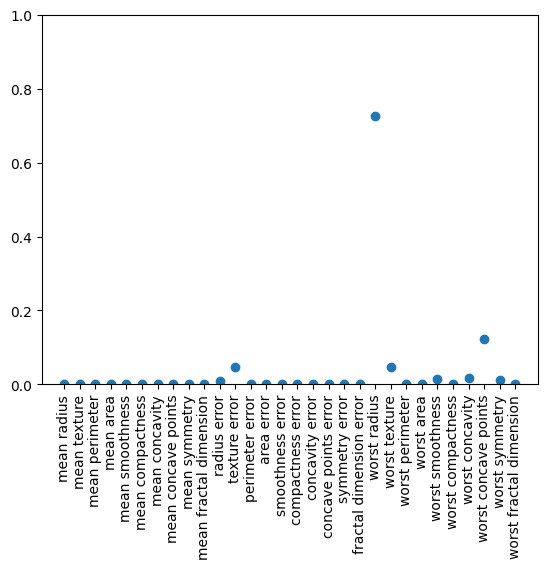

In [7]:
# Feature Importance
plt.plot(tree.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(0, 1)
plt.savefig('breast_cancer_feature_importance.jpg')